In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as p
import PIL as pil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical,normalize
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras import regularizers
import seaborn as sns
%matplotlib inline
import seaborn as sns
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import classification_report,confusion_matrix



Using TensorFlow backend.


In [ ]:
base=''

# **Accessing Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
train_path="gdrive/My Drive/CNN Assignment/Train/"
test_path="gdrive/My Drive/CNN Assignment/Test/"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)
metadata=read(os.path.join(train_path))
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
lesion_id       10015 non-null object
image_id        10015 non-null object
dx              10015 non-null object
dx_type         10015 non-null object
age             9958 non-null float64
sex             10015 non-null object
localization    10015 non-null object
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:

metadata.head()

In [ ]:
#Checking for NA
metadata.isna().isna().sum()

In [ ]:
df=read(os.path.join(metadata))
x=df.drop('label',axis=1)
y=df['label']
x=x.to_numpy()
x=x/255
y=to_categorical(y)

In [ ]:
df

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [ ]:
#Since there are 3 only classes, we can label them manually 
label={
    'Melanoma':0,
    'Nevus':1,
    'Keratosis':2
}

# **Images**

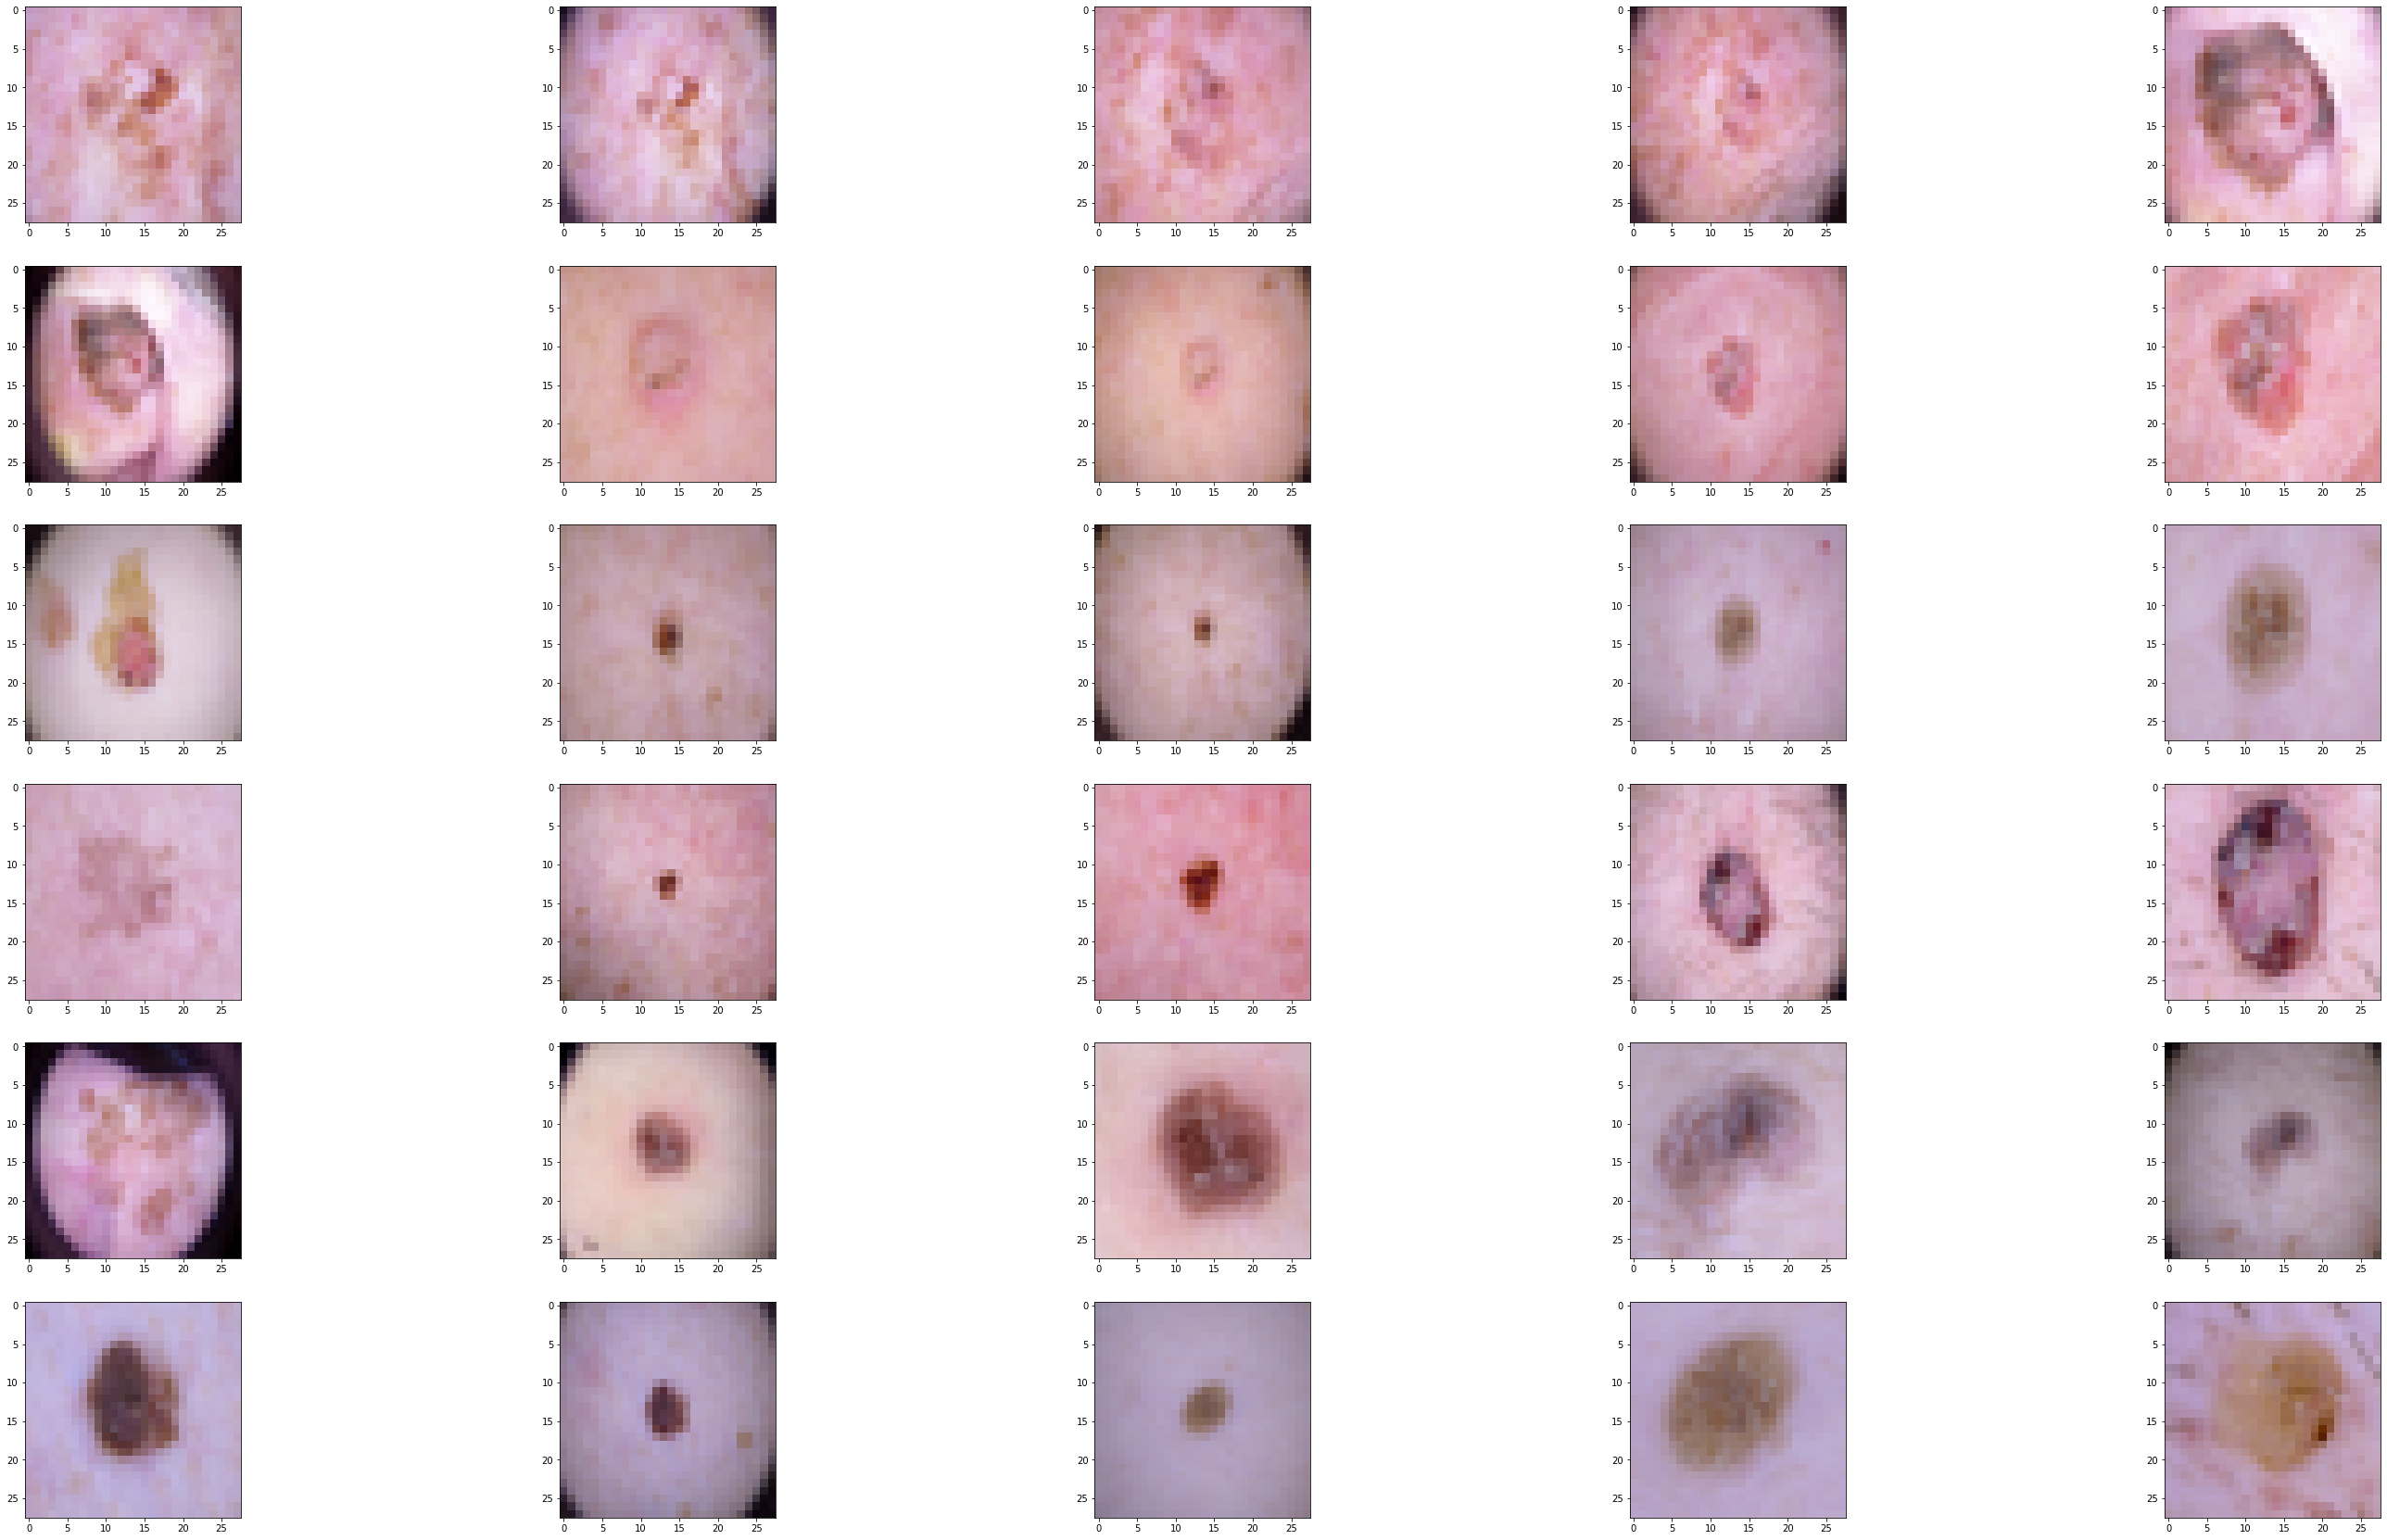

In [ ]:
x=x.reshape(-1,28,28,3)
p.figure(figsize=(50,30))
for i in range(30):
    p.subplot(6,5,i+1)
    img=x[i]
    p.imshow(img)

# Spliting of Dataset 

In [ ]:
trainx,trainy,testx,testy = train_test_split(x,y,test_size=0.02,random_state=42)

# Image Augmentation to expand Train data 

In [ ]:
data_generator=ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')

In [ ]:
data_generator.fit(trainx)

# CNN Model

In [ ]:
#input_shape=(28,28,3)

model=Sequential()


model.add(Conv2D(64,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(512,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Dropout(0.3))

model.add(Conv2D(1024,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Dropout(0.4))

model.add(Conv2D(1024,(1,1),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))



model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))


model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',Recall()])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
#Reviewing our CNN model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 512)       131584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 512)         0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 512)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 1024)        2

In [ ]:
early=EarlyStopping(monitor='accuracy',patience=4,mode='auto')

In [ ]:
#Training our CNN
model.fit(trainx,testx,epochs=20,batch_size=90,validation_data=(trainy, testy),callbacks=[early])

Train on 9814 samples, validate on 201 samples
Epoch 1/20
9814/9814 [==============================] - 109s 11ms/sample - loss: 0.7520 - acc: 0.7620 - recall: 0.6776 - val_loss: 1.1894 - val_acc: 0.6269 - val_recall: 0.4677
Epoch 2/20


9814/9814 [==============================] - 101s 10ms/sample - loss: 0.8032 - acc: 0.7540 - recall: 0.6548 - val_loss: 0.8866 - val_acc: 0.7065 - val_recall: 0.5821
Epoch 3/20


9814/9814 [==============================] - 99s 10ms/sample - loss: 0.7508 - acc: 0.7658 - recall: 0.6804 - val_loss: 0.9004 - val_acc: 0.7065 - val_recall: 0.5572
Epoch 4/20


9814/9814 [==============================] - 100s 10ms/sample - loss: 0.8486 - acc: 0.7550 - recall: 0.6609 - val_loss: 0.9790 - val_acc: 0.6766 - val_recall: 0.5423
Epoch 5/20


9814/9814 [==============================] - 106s 11ms/sample - loss: 0.7401 - acc: 0.7699 - recall: 0.6873 - val_loss: 0.8836 - val_acc: 0.7164 - val_recall: 0.6368
Epoch 6/20


9814/9814 [==============================] - 106s 11ms/sample - loss: 0.7230 - acc: 0.7686 - recall: 0.6924 - val_loss: 0.9124 - val_acc: 0.7015 - val_recall: 0.5622
Epoch 7/20


9814/9814 [==============================] - 106s 11ms/sample - loss: 0.7023 - acc: 0.7703 - recall: 0.6947 - val_loss: 0.8989 - val_acc: 0.7313 - val_recall: 0.5821
Epoch 8/20


9814/9814 [==============================] - 106s 11ms/sample - loss: 0.6981 - acc: 0.7751 - recall: 0.6948 - val_loss: 0.9751 - val_acc: 0.6517 - val_recall: 0.5622
Epoch 9/20


9814/9814 [==============================] - 105s 11ms/sample - loss: 0.6792 - acc: 0.7819 - recall: 0.7032 - val_loss: 1.1767 - val_acc: 0.5871 - val_recall: 0.5473
Epoch 10/20


9814/9814 [==============================] - 105s 11ms/sample - loss: 0.7034 - acc: 0.7773 - recall: 0.7033 - val_loss: 1.2443 - val_acc: 0.5920 - val_recall: 0.4627
Epoch 11/20


9814/9814 [==============================] - 107s 11ms/sample - loss: 0.7217 - acc: 0.7740 - recall: 0.6988 - val_loss: 1.4924 - val_acc: 0.4378 - val_recall: 0.2637
Epoch 12/20


9814/9814 [==============================] - 106s 11ms/sample - loss: 0.6665 - acc: 0.7886 - recall: 0.7180 - val_loss: 0.8901 - val_acc: 0.6866 - val_recall: 0.6219
Epoch 13/20


9814/9814 [==============================] - 103s 11ms/sample - loss: 0.6769 - acc: 0.7820 - recall: 0.7080 - val_loss: 0.9576 - val_acc: 0.6915 - val_recall: 0.6418
Epoch 14/20


9814/9814 [==============================] - 103s 10ms/sample - loss: 0.6576 - acc: 0.7940 - recall: 0.7250 - val_loss: 0.9050 - val_acc: 0.7065 - val_recall: 0.5473
Epoch 15/20


9814/9814 [==============================] - 103s 10ms/sample - loss: 0.6838 - acc: 0.7881 - recall: 0.7137 - val_loss: 2.2009 - val_acc: 0.2587 - val_recall: 0.2040
Epoch 16/20


9814/9814 [==============================] - 104s 11ms/sample - loss: 0.7615 - acc: 0.7649 - recall: 0.6791 - val_loss: 0.8507 - val_acc: 0.7015 - val_recall: 0.6219
Epoch 17/20


9814/9814 [==============================] - 102s 10ms/sample - loss: 0.6649 - acc: 0.7914 - recall: 0.7175 - val_loss: 0.9275 - val_acc: 0.6965 - val_recall: 0.6617
Epoch 18/20


9814/9814 [==============================] - 103s 11ms/sample - loss: 0.6413 - acc: 0.7988 - recall: 0.7338 - val_loss: 0.8643 - val_acc: 0.7015 - val_recall: 0.6567
Epoch 19/20


9814/9814 [==============================] - 102s 10ms/sample - loss: 0.6243 - acc: 0.7989 - recall: 0.7401 - val_loss: 0.9158 - val_acc: 0.7264 - val_recall: 0.6617
Epoch 20/20


9814/9814 [==============================] - 102s 10ms/sample - loss: 0.6285 - acc: 0.8068 - recall: 0.7445 - val_loss: 0.9961 - val_acc: 0.6965 - val_recall: 0.6468


In [ ]:
model.history

In [41]:
#Building a report 
predictions=model.predict_classes(trainy)

check=[]
for i in range(len(testy)):
    for j in range(7):
        if(testy[i][j]==1):
            check.append(j)
check=np.asarray(check)

print(classification_report(check,predictions))

	Precision    Recall	 F1-Score	Support
0	0.35	     0.88	 0.50	        8
1	0.28	     0.73	 0.40	        11
2	0.48	     0.46	 0.47	        26
3	0.00	     0.00	 0.00	        3
4	0.89	     0.85	 0.87	        123
5	1.00	     0.67	 0.80	        3
6	0.86	     0.22	 0.35	        27

accuracy	        	 0.85	        201
Macro   0.55	     0.54	 0.48           201
Average
Wghtd   0.77         0.70	 0.70           201
Average


In [ ]:
model.save_weights('model_saved.h5')

## Visualizing Training Results

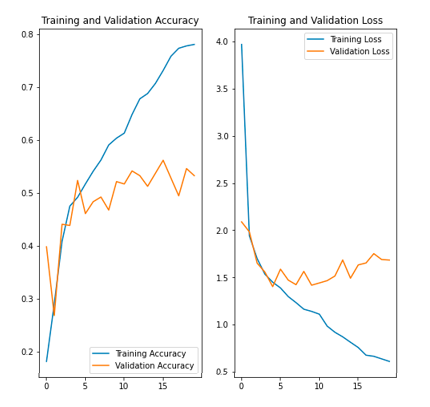

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediction and Testing

In [50]:
model = load_model('saved_model.h5')
 
#Melanoma
image = load_img('gdrive/My Drive/CNN Assignment/Test/ISIC_0015167', target_size=(227, 227))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,227,227,3)
label = model.predict_classes(img)
print("Predicted Class (0 - Melanoma , 1- Nevus, Seborrheic Keratosis - 2): ", label[0][0])

#Nevus
image = load_img('gdrive/My Drive/CNN Assignment/Test/ISIC_0016057', target_size=(227, 227))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,227,227,3)
label = model.predict_classes(img)
print("Predicted Class (0 - Melanoma , 1- Nevus, Seborrheic Keratosis - 2): ", label[0][0])

#Keratosis
image = load_img('gdrive/My Drive/CNN Assignment/Test/ISIC_0014643', target_size=(227, 227))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,227,227,3)
label = model.predict_classes(img)
print("Predicted Class (0 - Melanoma , 1- Nevus, Seborrheic Keratosis - 2): ", label[0][0])

Predicted Class (0 - Melanoma , 1- Nevus, Seborrheic Keratosis - 2): 0
Predicted Class (0 - Melanoma , 1- Nevus, Seborrheic Keratosis - 2): 1
Predicted Class (0 - Melanoma , 1- Nevus, Seborrheic Keratosis - 2): 2
